In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
X = pd.read_csv('logisticX.csv', header=None).values
Y = pd.read_csv('logisticY.csv', header=None).values
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
X = np.hstack((np.ones((X.shape[0], 1)), X))

In [3]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [4]:
def compute_cost(X, Y, theta):
    m = len(Y)
    h = sigmoid(np.dot(X, theta))
    cost = -(1 / m) * (np.dot(Y.T, np.log(h)) + np.dot((1 - Y).T, np.log(1 - h)))
    return cost[0][0]


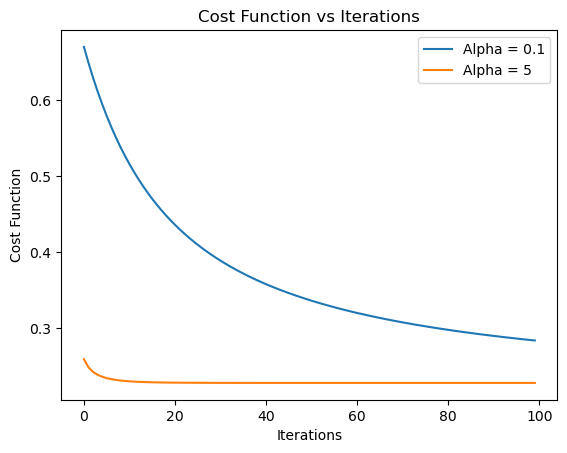

In [5]:
def gradient_descent(X, Y, theta, alpha, iterations):
    m = len(Y)
    cost_history = []
    for _ in range(iterations):
        h = sigmoid(np.dot(X, theta))
        gradient = (1 / m) * np.dot(X.T, (h - Y))
        theta -= alpha * gradient
        cost_history.append(compute_cost(X, Y, theta))
    return theta, cost_history
alpha_1 = 0.1
alpha_2 = 5
iterations = 100
initial_theta = np.zeros((X.shape[1], 1))
theta_1, cost_history_1 = gradient_descent(X, Y, initial_theta, alpha_1, iterations)
theta_2, cost_history_2 = gradient_descent(X, Y, initial_theta, alpha_2, iterations)
plt.plot(range(iterations), cost_history_1, label=f'Alpha = {alpha_1}')
plt.plot(range(iterations), cost_history_2, label=f'Alpha = {alpha_2}')
plt.xlabel('Iterations')
plt.ylabel('Cost Function')
plt.title('Cost Function vs Iterations')
plt.legend()
plt.show()

In [6]:
def plot_decision_boundary(X, Y, theta):
    plt.figure(figsize=(8, 6))

    # Class 0 points
    class_0 = (Y == 0).flatten()
    plt.plot(X[class_0, 1], X[class_0, 2], 'r.', label='Class 0')

    # Class 1 points
    class_1 = (Y == 1).flatten()
    plt.plot(X[class_1, 1], X[class_1, 2], 'b.', label='Class 1')

    # Decision boundary line
    x_values = [np.min(X[:, 1]), np.max(X[:, 1])]
    y_values = -(theta[0, 0] + theta[1, 0] * np.array(x_values)) / theta[2, 0]
    plt.plot(x_values, y_values, 'g-', label='Decision Boundary')

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.title('Dataset with Decision Boundary')
    plt.show()


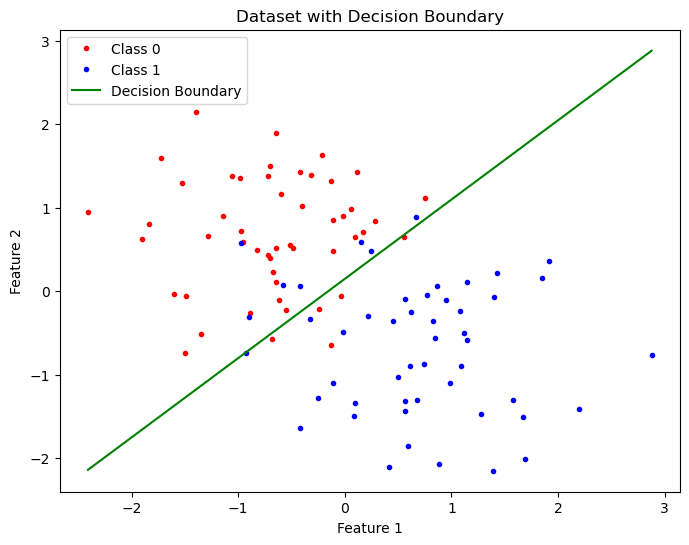

In [7]:
plot_decision_boundary(X, Y.flatten(), theta_1)

In [8]:
def predict(X, theta):
    return sigmoid(np.dot(X, theta)) >= 0.5


In [9]:
def confusion_matrix(Y, Y_pred):
    tp = np.sum((Y == 1) & (Y_pred == 1))
    tn = np.sum((Y == 0) & (Y_pred == 0))
    fp = np.sum((Y == 0) & (Y_pred == 1))
    fn = np.sum((Y == 1) & (Y_pred == 0))
    return tp, tn, fp, fn


In [10]:
Y_pred = predict(X, theta_1)
tp, tn, fp, fn = confusion_matrix(Y, Y_pred)
accuracy = (tp + tn) / len(Y)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = 2 * (precision * recall) / (precision + recall)
print(f"Confusion Matrix: TP={tp}, TN={tn}, FP={fp}, FN={fn}")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1_score}")

Confusion Matrix: TP=43, TN=45, FP=5, FN=7
Accuracy: 0.88
Precision: 0.8958333333333334
Recall: 0.86
F1 Score: 0.8775510204081632


In [11]:
# Cost Function and Learning Parameters After Convergence

print(f"Final Cost Function Value (alpha=0.1): {cost_history_1[-1]}")
print(f"Final Theta (alpha=0.1): {theta_1.flatten()}")


Final Cost Function Value (alpha=0.1): 0.2841926502977452
Final Theta (alpha=0.1): [ 0.40109073  2.58812794 -2.72511796]
